# 07. 两比特门

## CNOT门

CNOT门应该是双比特门中最有名的一个，其作用在计算基矢的效果如下：
$$
|00\rangle \rightarrow |00\rangle
$$

$$
|01\rangle \rightarrow |01\rangle
$$

$$
|10\rangle \rightarrow |11\rangle
$$

$$
|11\rangle \rightarrow |10\rangle
$$

通常第一个比特被称为控制比特，第二个比特被称为目标比特。以上形式可以用更紧凑的形式表示：
$$
|x,y\rangle \rightarrow |x,y\oplus x\rangle
$$

其中$y\oplus x$是按位乘法（模二加法），等同于异或门（XOR gate）。

以下是CNOT门的矩阵形式：
$$
U_{\mathrm{CNOT}}=\left[\begin{array}{l}
1 \\
0 \\
0 \\
0
\end{array}\right]\langle 00|+\left[\begin{array}{l}
0 \\
1 \\
0 \\
0
\end{array}\right]\langle 01|+\left[\begin{array}{l}
0 \\
0 \\
0 \\
1
\end{array}\right]\langle 10|+\left[\begin{array}{l}
0 \\
0 \\
1 \\
0
\end{array}\right]\langle 11|=\left[\begin{array}{llll}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{array}\right]
$$

在量子线路中，CNOT门用下面的符号表示：

![cnot in circuit](images/cnot_gate.png)

实际上CNOT门就是控制X门：

![cnot equivalent](images/cnot_equivalent.png)

CNOT门是可逆的，并且有$CNOT \enspace CNOT=I$。

稍后我们将证明CNOT门与单比特门的集合对于量子计算是通用的，即我们可以用它们构造任意数量的量子比特的所有幺正变换。

---

在 MindQuanutum 中一般通过为X门添加控制位的方式得到CNOT门，因为 MindQuantum 可以简洁地为任意量子门添加控制位，只需要输入控制位作为第二个参数。也可以直接使用 `CNOT` 门（不推荐），`CNOT(1, 0)` 表示 `q0` 控制位 `q1` 目标位。

q0: ────■─────■─────
        ┃     ┃     
      ┏━┻━┓ ┏━┻━┓   
q1: ──┨╺╋╸┠─┨╺╋╸┠───
      ┗━━━┛ ┗━━━┛   


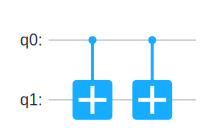

In [1]:
from mindquantum.core.gates import X, CNOT
from mindquantum.core.circuit import Circuit

circ = Circuit()
circ += X.on(1, 0)
circ += CNOT(1, 0)
print(circ)
circ.svg()

对于其它的量子门，同样可以用该方式添加控制位：

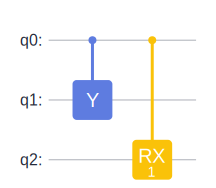

In [2]:
from mindquantum.core.gates import Y, RX
from mindquantum.core.circuit import Circuit

circ = Circuit()
circ += Y.on(1, 0)
circ += RX(1).on(2, 0)
circ.svg()

如果需要更多控制位，只需要将 `on` 的第二个参数修改为列表即可：

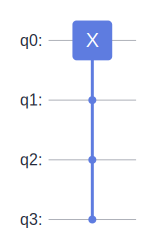

In [3]:
from mindquantum.core.gates import X
from mindquantum.core.circuit import Circuit

circ = Circuit()
circ += X.on(0, [1, 2, 3])
circ.svg()

## SWAP门

三个CNOT门可以构成SWAP门：

![SWAP gate](images/swap_gate.png)

作用于 0，1 基的效果如下：
$$
\begin{aligned}
|00\rangle & \rightarrow|00\rangle \rightarrow|00\rangle \rightarrow|00\rangle \\
|01\rangle & \rightarrow|01\rangle \rightarrow|11\rangle \rightarrow|10\rangle \\
|10\rangle & \rightarrow|11\rangle \rightarrow|01\rangle \rightarrow|01\rangle \\
|11\rangle & \rightarrow|10\rangle \rightarrow|10\rangle \rightarrow|11\rangle
\end{aligned}
$$

可以看到，SWAP门的作用正是交换两个比特的量子态，数学表示如下：

$$
U_{S W A P}(\alpha|0\rangle+\beta|1\rangle)(\gamma|0\rangle+\delta|1\rangle)=(\gamma|0\rangle+\delta|1\rangle)(\alpha|0\rangle+\beta|1\rangle)
$$

也可以记为以下形式：

$$
U_{S W A P}(\alpha \gamma|00\rangle+\beta \gamma|10\rangle+\alpha \delta|01\rangle+\beta \delta|11\rangle)=\alpha \gamma|00\rangle+\beta \gamma|01\rangle+\alpha \delta|10\rangle+\beta \delta|11\rangle
$$

---

在MindQuantum中，SWAP门的用法与其它基本门相似，唯一的区别是它有两个目标比特，因此需要将包含两个目标位的`list[int]`作为参数输入：

q0: ──╳───
      ┃   
      ┃   
q1: ──╳───


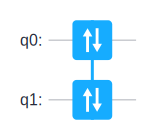

In [4]:
from mindquantum.core.gates import SWAP
from mindquantum.core.circuit import Circuit

circ = Circuit()
circ += SWAP.on([1, 0])
print(circ)
circ.svg()

In [5]:
from show_info import InfoTable

InfoTable('mindquantum')

# 习题

## Exercise 1
若$q_0$处于叠加态$| \psi\rangle =\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$，$q_1$处于$|0\rangle$态，现在对$q_0$、$q_1$作用CNOT门（控制位为$q_0$，目标位为$q_1$），请问该两比特系统的末态是什么样的，你是否能叫出它的名字？请用MindQuantum计算或验证你的结果。

Hint：Lecture 5 中我们学过，哈达玛门`H`作用在$|0\rangle$态效果如下：
$$
H|0\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)
$$

## Exercise 2

请你用MindQuantum验证SWAP门可以分解为三个CNOT门（即两者矩阵等价）。